In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [3]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [4]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [5]:
print(lass.score(X_test, Y_test))
print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


# Regularization parameter: Lasso

In [15]:
# Store estimates.
estimates = np.append(np.append(lassBig.coef_, lassBig.intercept_), [0.35])   

# Storing legend information.
labels = []

# Store R-square
R_square_Lasso = []

#Run the model for many alphas.
#for lambd in range(1, 50, 2):
for lambd in np.arange(0, 0.1, 0.02):
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(np.append(lassBig.coef_, lassBig.intercept_), [lambd])))
    R_square_Lasso = np.append(R_square_Lasso, lassBig.score(X_test2, Y_test))



C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# play around with this

In [16]:
# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['Intercept'] + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

estimates_df

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3,Intercept,lambda
1,-0.002061,-0.758818,0.060481,-0.003535,0.009268,-0.003793,0.176198,-0.000206,-9.115325e-07,1.203915,0.00
2,0.000000,-0.738715,-0.000000,-0.000000,0.002006,-0.000000,-0.000000,-0.000002,-1.037485e-08,0.030164,0.02
3,0.000000,-0.717632,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000018,-1.931312e-08,0.198661,0.04
4,0.000000,-0.696451,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000038,-3.933964e-08,0.423122,0.06
5,0.000000,-0.675272,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000060,-5.292718e-08,0.650789,0.08
0,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-5.425335e-06,5.429506,0.35


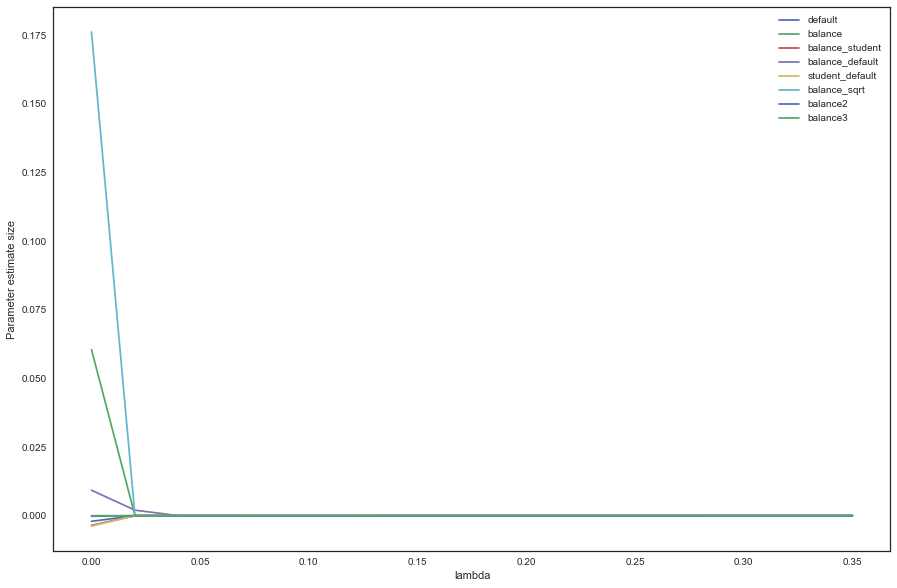

In [17]:
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
plt.figure(figsize=(15,10))

for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

# Regularization parameter: Ridge

In [11]:
# Declare Ridge Model
ridgeregrBig = linear_model.Ridge(alpha=0.35, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)

# Store estimates.
estimates = np.append(ridgeregrBig.coef_,[0.35])   

# Storing legend information.
labels = []

# Store R-square
R_square_Ridge = []

#Run the model for many alphas.
for lambd in np.arange(0.1, 2, 0.1):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_, [lambd])))
    R_square_Ridge = np.append(R_square_Ridge, lassBig.score(X_test2, Y_test))

In [12]:
# Make the data pretty.
estimates_df = pd.DataFrame(estimates, columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

estimates_df

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3,lambda
1,-0.005368,-0.758931,0.273631,-0.001662,0.012567,-0.004421,-0.025248,0.002788,-0.000028,0.10
2,-0.005204,-0.758908,0.261232,-0.001759,0.012404,-0.004389,-0.024299,0.002661,-0.000026,0.20
3,-0.005054,-0.758885,0.249916,-0.001847,0.012255,-0.004360,-0.023309,0.002546,-0.000025,0.30
0,-0.004984,-0.758873,0.244618,-0.001889,0.012185,-0.004347,-0.022832,0.002492,-0.000025,0.35
4,-0.004916,-0.758862,0.239540,-0.001929,0.012119,-0.004333,-0.022371,0.002440,-0.000024,0.40
5,-0.004789,-0.758840,0.229990,-0.002004,0.011993,-0.004309,-0.021496,0.002343,-0.000023,0.50
6,-0.004672,-0.758818,0.221171,-0.002074,0.011876,-0.004286,-0.020683,0.002252,-0.000022,0.60
7,-0.004563,-0.758797,0.213003,-0.002138,0.011768,-0.004265,-0.019926,0.002169,-0.000021,0.70
8,-0.004461,-0.758776,0.205415,-0.002199,0.011668,-0.004245,-0.019222,0.002092,-0.000021,0.80
9,-0.004366,-0.758755,0.198348,-0.002255,0.011575,-0.004226,-0.018565,0.002019,-0.000020,0.90


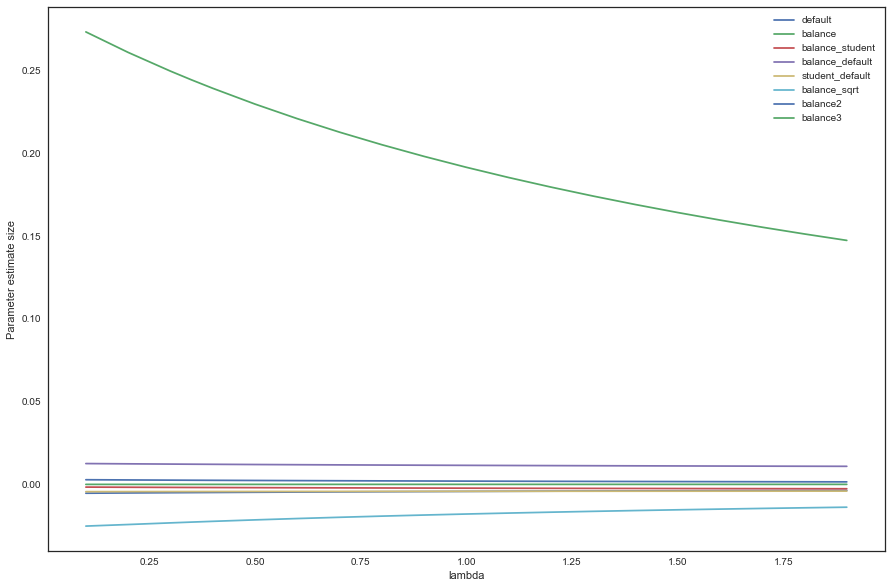

In [165]:
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
plt.figure(figsize=(15,10))

for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

# Compare the R-Square between Ridge and Lasso Regression

In [169]:
df_R = pd.DataFrame({'Ridge' : R_square_Ridge,
                     'Lasso' : R_square_Lasso})
df_R

,Lasso,Ridge
0,0.563159,0.563159
1,0.554673,0.554673
2,0.524355,0.524355
3,0.472263,0.472263
4,0.398386,0.398386
5,0.302733,0.302733
6,0.185291,0.185291
7,0.046088,0.046088
8,0.019253,0.019253
9,0.019253,0.019253


    Appears to have identical R-Square